In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import Models for training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Import Evaluation Metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc

In [41]:
df = pd.read_csv("dataset_heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [44]:
df['target'].value_counts()
# 1 is female
# 0 is male

target
1    165
0    138
Name: count, dtype: int64

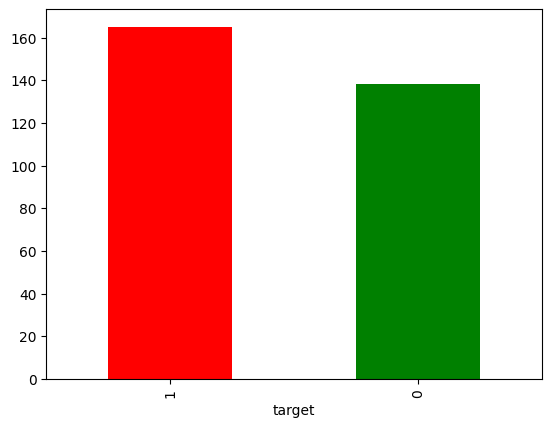

In [45]:
df['target'].value_counts().plot(kind = 'bar', color = ['red','green']);

In [46]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
# Checking Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [48]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [49]:
# checking how many male and female have disease
pd.crosstab(df.target,df.sex)

# 0 in target is not having disease
# 1 is having disease

sex,0,1
target,,
0,24,114
1,72,93


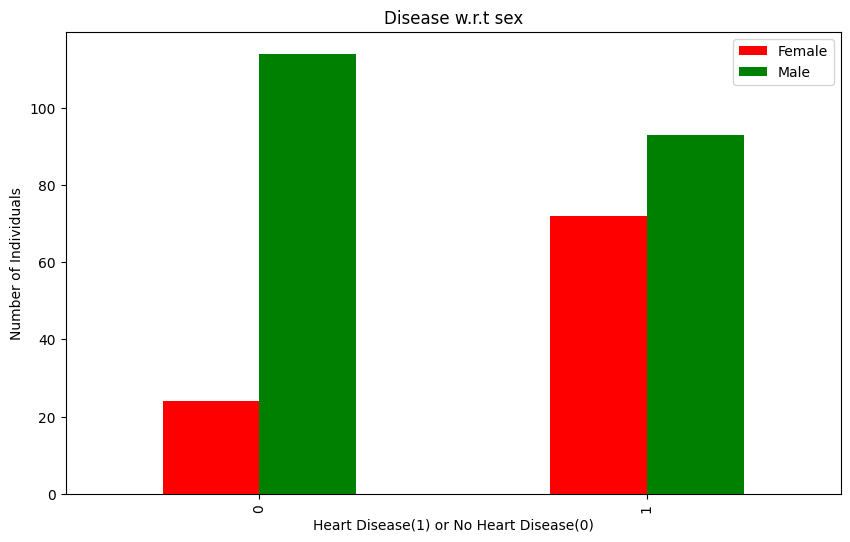

In [50]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,6), color = ['red','green'])
plt.title("Disease w.r.t sex")
plt.xlabel("Heart Disease(1) or No Heart Disease(0)")
plt.ylabel("Number of Individuals")
plt.legend(['Female','Male'])

In [51]:
# thalach = maximum heart rate
print(df.thalach)

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

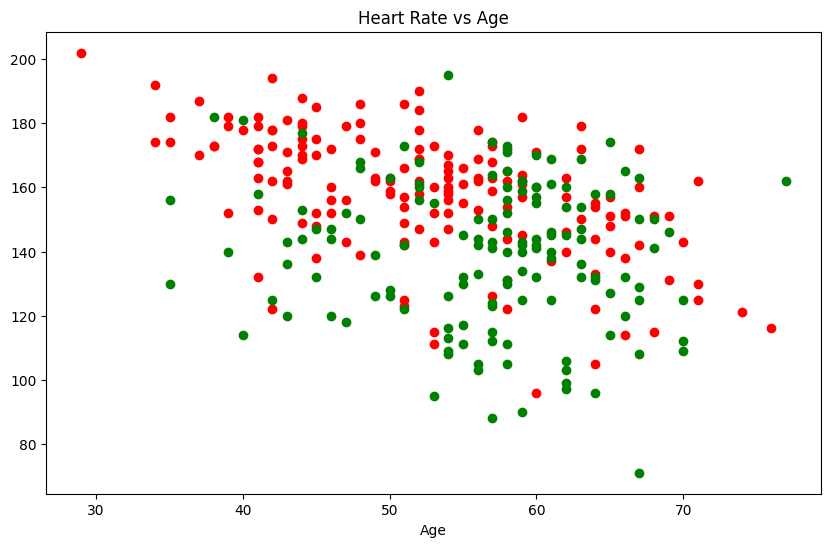

In [52]:
# Finding Pattern Using Scatter Plot
plt.figure(figsize=(10,6))
# Plot for people who have heart Disease 
plt.scatter(df.age[df.target == 1], df.thalach[df.target==1], color = ['red'])
# Plot for people who don'  t have heart Disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target==0], color = ['green'])

plt.title("Heart Rate vs Age")
plt.xlabel("Age")
plt.ylabel

<Axes: ylabel='Frequency'>

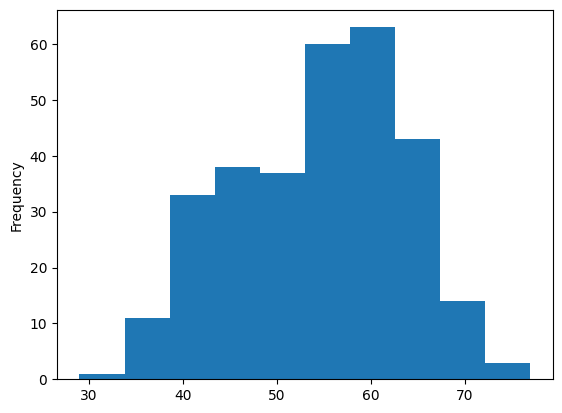

In [53]:
# Age Distribution 
df.age.plot.hist()

In [54]:
# Chest Pain and their Types
df.cp

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

cp: chest pain type

    -- Value 0: typical angina: chest pain due to decrease blood pressure.
    
    -- Value 1: atypical angina: Cheast pain not related to Heart Problem
    
    -- Value 2: non-anginal pain: Not Heart Related
    
    -- Value 3: asymptomatic: chest pain not showing Heart Problem

In [55]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


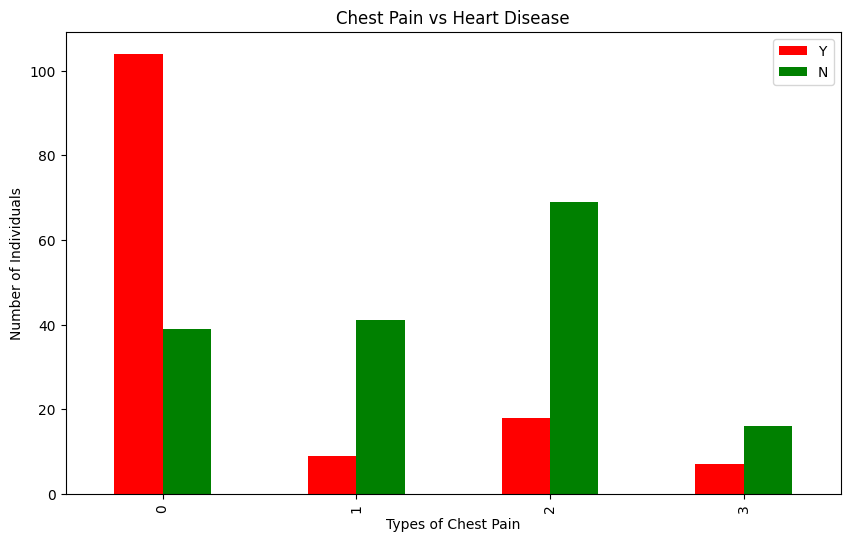

In [56]:
# Relation between Chest Pain and Heart Disease
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10,6), color = ['red','green'])
plt.title("Chest Pain vs Heart Disease")
plt.xlabel("Types of Chest Pain")
plt.ylabel("Number of Individuals")
plt.legend(['Y','N'])

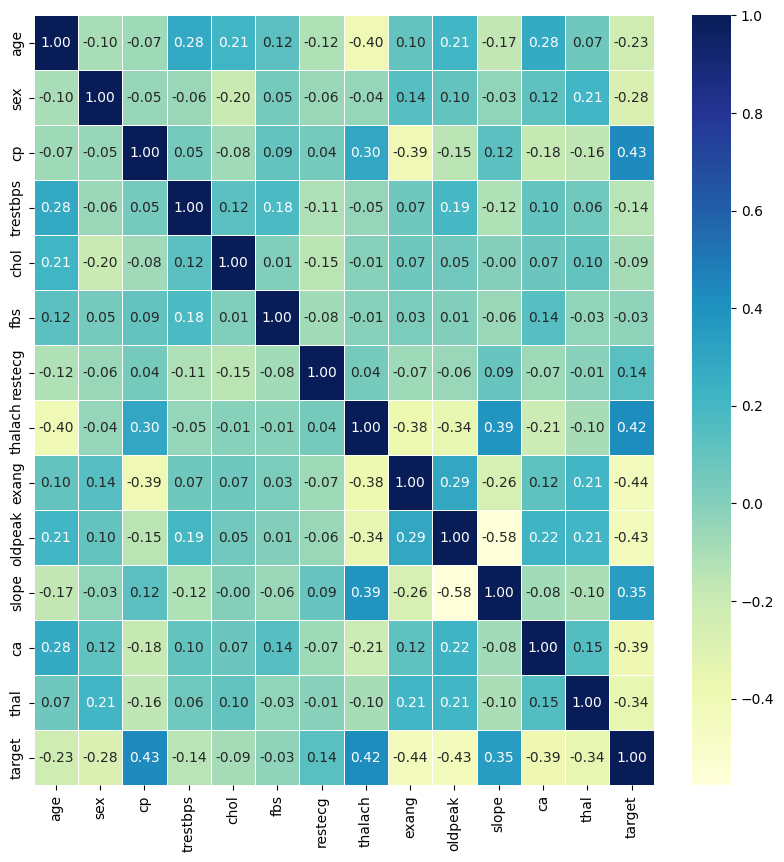

In [57]:
# Correlation Matrix
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,annot=True,linewidths=0.5,fmt='0.2f',cmap='YlGnBu'); # fmt: value after point two

In [58]:
# Now training the model
X = df.drop('target', axis=1)
Y = df['target']

In [59]:
X
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [60]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [61]:
# Now fitting into the models 
models = {'LR': LogisticRegression(),'Random Forest':RandomForestClassifier(),'KNN':KNeighborsClassifier(), 'SVM' : SVC()}
# fit_and score is a function for fitting the data into the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)*100
    return model_score   

In [62]:
model_scores = fit_and_score(models,x_train,x_test, y_train,y_test)
model_scores

C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 73.77049180327869,
 'Random Forest': 72.1311475409836,
 'KNN': 55.73770491803278,
 'SVM': 62.295081967213115}

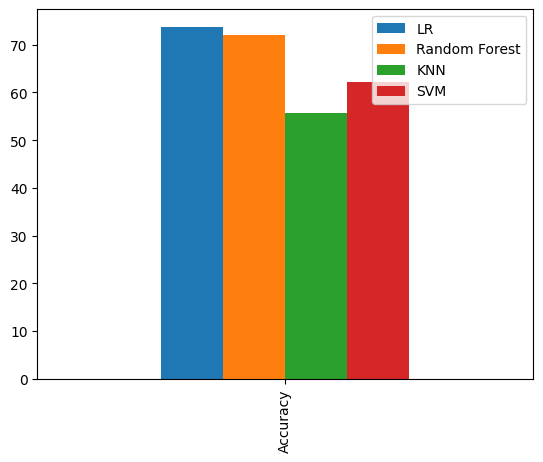

In [63]:
# Now comparing the Models
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar();

 Accuracies of Each Model:
 * Logistic Regression: 73.77
 * Random Forest: 72.13
 * KNN: 55.73
 * SVM: 62.29

In [64]:
#Now we have the initial accuracies we can try to improve them
# We can improve them by Hypertuning the models

In [65]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

In [66]:
# Improving KNN 
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for the value
    KNN.fit(x_train,y_train)
    # Update the training score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))

In [67]:
max(test_score)*100

70.49180327868852

In [68]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

Max KNN Score:70.49%


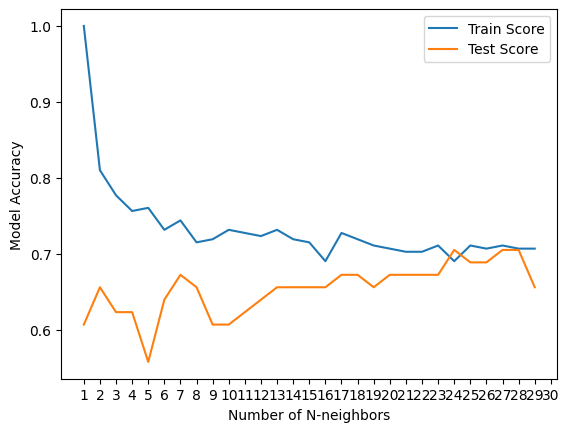

In [69]:
# Plotting the accuracy of KNN model after HyperTuning
plt.plot(nneighbors,train_score, label='Train Score')
plt.plot(nneighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,31,1))
# Static beauty
plt.xlabel('Number of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f'Max KNN Score:{max(test_score)*100:0.2f}%')

<H3> There are two types of HyperParameter Tuning which can be used for LR and RFC


<ul>
  <li>Grid Search</li>
  <li>Random Search</li>
</ul>

<H3> First let us use Random Search for Hypertuning the models

In [70]:
# U need to create dictionaries before applying the hyperparameters
LR_hp = {'C': np.logspace(-4,4,20), 'solver': ['liblinear']}
RFC_hp = {'n_estimators':np.arange(10,1600,100),'max_depth':[None,3,5,6,10],'min_samples_split':np.arange(2,20,2),'min_samples_leaf':np.arange(1,20,2)}

In [71]:
# To first apply this for Logistic Regression 
# Apply random seed first
np.random.seed(7)

# Applying RSCV to LR
lr_rscv = RandomizedSearchCV(LogisticRegression(),param_distributions=LR_hp,cv=15,n_iter=20,verbose=True)
# Model fitting 
lr_rscv.fit(x_train,y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


RandomizedSearchCV(cv=15, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [72]:
lr_rscv.score(x_test,y_test)*100

75.40983606557377

In [73]:
lr_rscv.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [74]:
# Now apply the same thing to RFC
# Apply random seed first
np.random.seed(7)

# Applying RSCV to RFC
rfc_rscv = RandomizedSearchCV(RandomForestClassifier(),param_distributions=RFC_hp,cv=5,n_iter=20,verbose=True)
# Model fitting 
rfc_rscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [75]:
rfc_rscv.score(x_test,y_test)*100

70.49180327868852

In [76]:
rfc_rscv.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

In [77]:
# Define hyperparameter distribution
svm_hp = {
    'C': np.logspace(-3, 3, 10),           # C from 0.001 to 1000
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel options
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Gamma values
    'degree': [2, 3, 4]                    # Polynomial degree
}

# Initialize SVM
svm = SVC()

# Randomized Search
random_search = RandomizedSearchCV(estimator=svm, 
                                   param_distributions=svm_hp, 
                                   n_iter=20,        # Number of random combinations
                                   cv=5,             # 5-fold cross-validation
                                   scoring='accuracy',
                                   verbose=2, 
                                   random_state=42)
random_search.fit(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   7.0s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   2.7s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=  11.5s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=  15.0s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   2.5s
[CV] END C=0.021544346900318832, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.021544346900318832, degree=3,

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.01, 0.1,
                                                  1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=2)

In [78]:
random_search.best_score_*100

73.71794871794873

In [79]:
random_search.best_params_

{'kernel': 'linear', 'gamma': 1, 'degree': 3, 'C': 0.021544346900318832}

<H3> Now use Grid Search for hypertuning </H3>

In [80]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2'],'solver': ['liblinear', 'saga'],'max_iter': [100, 200, 300]}

In [81]:
# To first apply this for Logistic Regression 
# Apply random seed first
np.random.seed(7)

# Applying GSCV to LR
lr_gscv = GridSearchCV(LogisticRegression(),param_grid=lr_param_grid,cv=5,verbose=True)
# Model fitting 
lr_gscv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [82]:
lr_gscv.score(x_test,y_test)*100

73.77049180327869

In [83]:
lr_gscv.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# Now apply the same thing to RFC
# Apply random seed first
np.random.seed(7)

# Applying GSCV to RFC
rfc_gscv = GridSearchCV(RandomForestClassifier(n_jobs=1),param_grid=RFC_hp,cv=5,verbose=True)
# Model fitting 
rfc_gscv.fit(x_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


In [ ]:
rfc_gscv.score(x_test,y_test)*100

In [ ]:
rfc_gscv.best_params_

In [ ]:
# Now use GSCV for SVM
svm_hp = {
    'C': [0.1, 1, 10],                      # Narrowed regularization parameters
    'kernel': ['linear', 'rbf'],            # Removed 'poly' for simplicity
    'gamma': ['scale', 0.1, 1],             # Focused gamma values
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, 
                           param_grid=svm_hp, 
                           cv=5,           # 5-fold cross-validation
                           scoring='accuracy', 
                           verbose=2)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_score_ *100

In [ ]:
grid_search.best_params_

<H3> Accuracies after Improving</H3>
<ul>
  <li>Logistic Regression: 73.77 --> 75.40(RSCV) </li>
  <li>Random Forest: 72.13 --> 70.49(RSCV)</li>
  <li>KNN: 55.73 --> 70.49</li>
  <li>SVM: 62.29 --> 85.97(RSCV)</li>
</ul>

<H5>Since SVM has the highest accuracy we take that</H5>

In [ ]:

knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Apply GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
